In [14]:
import pandas as pd

import numpy as np

import missingno as msno

import matplotlib.pyplot as plt

from pandas import DataFrame

import scipy.stats as stats

from scipy.stats import skew, kurtosis

import seaborn as sns

from sklearn.decomposition import PCA

import statistics as stat

#Loading the CSV of the default dataset
df = pd.read_csv(r'C:\Users\mmorg\Desktop\D207 Assessment Files\medical_clean.csv')

#Turn categorical values into quantitative data
df['Marital_numeric'] = df['Marital']
dict_marital = {"Marital_numeric": {"Never Married": 0,"Separated": 1,"Widowed": 2,"Divorced": 3, "Married": 4}}
df.replace(dict_marital, inplace=True)

df['Gender_numeric'] = df['Gender']
dict_gender = {"Gender_numeric": {"Prefer not to answer": 0,"Male": 1,"Female": 2}}
df.replace(dict_gender, inplace=True)

df['ReAdmis_numeric'] = df['ReAdmis']
dict_ReAdmis = {"ReAdmis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_ReAdmis, inplace=True)

df['Soft_drink_numeric'] = df['Soft_drink']
dict_Soft_drink = {"Soft_drink_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_Soft_drink, inplace=True)

df['Initial_admin_numeric'] = df['Initial_admin']
dict_Initial_admin = {"Initial_admin_numeric": {"Emergency Admission": 0, "Elective Admission": 1,"Observation Admission": 2}}
df.replace(dict_Initial_admin, inplace=True)

df['HighBlood_numeric'] = df['HighBlood']
dict_HighBlood = {"HighBlood_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_HighBlood, inplace=True)

df['Stroke_numeric'] = df['Stroke']
dict_stroke = {"Stroke_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_stroke, inplace=True)

df['Complication_risk_numeric'] = df['Complication_risk']
dict_complication = {"Complication_risk_numeric": {"Low": 0, "Medium": 1, "High": 2}}
df.replace(dict_complication, inplace=True)

df['Arthritis_numeric'] = df['Arthritis']
dict_arthritis = {"Arthritis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_arthritis, inplace=True)

df['Diabetes_numeric'] = df['Diabetes']
dict_diabetes = {"Diabetes_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_diabetes, inplace=True)

df['Hyperlipidemia_numeric'] = df['Hyperlipidemia']
dict_hyperlipidemia = {"Hyperlipidemia_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_hyperlipidemia, inplace=True)

df['BackPain_numeric'] = df['BackPain']
dict_backpain = {"BackPain_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_backpain, inplace=True)

df['Allergic_rhinitis_numeric'] = df['Allergic_rhinitis']
dict_allergies = {"Allergic_rhinitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_allergies, inplace=True)

df['Reflux_esophagitis_numeric'] = df['Reflux_esophagitis']
dict_reflux = {"Reflux_esophagitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_reflux, inplace=True)

df['Asthma_numeric'] = df['Asthma']
dict_asthma = {"Asthma_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_asthma, inplace=True)

df['Services_numeric'] = df['Services']
dict_services = {"Services_numeric": {"Blood Work": 0, "Intravenous": 1, "CT Scan": 2, "MRI": 3}}
df.replace(dict_services, inplace=True)

##Univariate Stats Dataframe
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 'Min', '25%', 'Median', '75% Quartile', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mean(), df[col].mode().values[0], df[col].min(), df[col].quantile(.25), df[col].median(), df[col].quantile(.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurtosis()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df.sort_values(by=['Numeric', 'Skew', 'Unique'], ascending=False)

df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'County', 'Zip', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)
print(unistats(df))

                            Count  Missing  Unique    Dtype  Numeric  \
vitD_supp                   10000        0       6    int64     True   
Stroke_numeric              10000        0       2    int64     True   
Children                    10000        0      11    int64     True   
Income                      10000        0    9993  float64     True   
Soft_drink_numeric          10000        0       2    int64     True   
Services_numeric            10000        0       4    int64     True   
Diabetes_numeric            10000        0       2    int64     True   
Full_meals_eaten            10000        0       8    int64     True   
Asthma_numeric              10000        0       2    int64     True   
Additional_charges          10000        0    9418  float64     True   
Hyperlipidemia_numeric      10000        0       2    int64     True   
Arthritis_numeric           10000        0       2    int64     True   
ReAdmis_numeric             10000        0       2    int64     

In [13]:
# Bivariate: Numeric to numeric: Correlation
# Bivariate: Numeric to categorical: one-way ANOVA (3+ groups) or t-test (2 groups)
# Bivariate: categorical to categorical: Chi-square

def bivstats(df, label): 
   from scipy import stats
   import pandas as pd
    
   #Create an empty dataframe to store output in order, correlation, anova, chi-squared, and p-value
   output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])
    
   for col in df: 
       if pd.api.types.is_numeric_dtype(df[col]): #Only calculate r, p-value, for numeric columns
           r, p = stats.pearsonr(df[label], df[col])
           output_df.loc[col] = [round(r, 3), '-', '-', round(p, 3)]
            
   output_df.sort_values(by=['p-value'], ascending=True)

   return output_df

bivstats(df, 'ReAdmis_numeric')

,r,F,X2,p-value
Children,0.024,-,-,0.019
Age,0.016,-,-,0.114
Income,-0.012,-,-,0.250
VitD_levels,0.004,-,-,0.683
Doc_visits,0.000,-,-,0.980
Full_meals_eaten,-0.012,-,-,0.224
vitD_supp,0.011,-,-,0.270
Initial_days,0.851,-,-,0.000
TotalCharge,0.844,-,-,0.000
Additional_charges,0.014,-,-,0.173


In [36]:
fvalue, pvalue = stats.f_oneway(df['ReAdmis_numeric'], df['Initial_days'], df['Children'], df['Initial_admin_numeric'])
print(fvalue, pvalue)

16007.662197284086 0.0


<AxesSubplot:xlabel='Initial_days', ylabel='Count'>

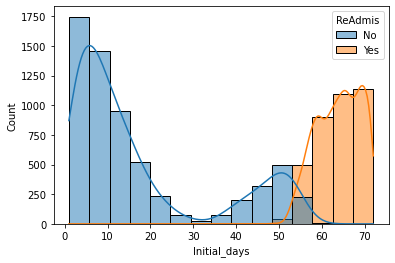

In [17]:
sns.histplot(data=df, x="Initial_days", hue="ReAdmis", kde=True)

<AxesSubplot:xlabel='Children', ylabel='Count'>

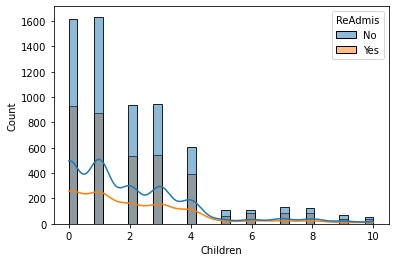

In [28]:
sns.histplot(data=df, x="Children", hue="ReAdmis", kde=True)

<AxesSubplot:xlabel='Initial_admin', ylabel='Count'>

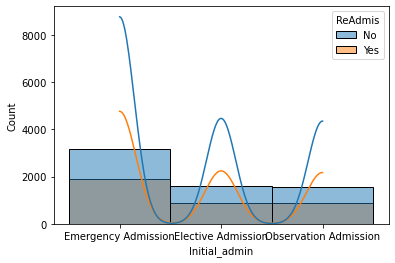

In [32]:
sns.histplot(data=df, x="Initial_admin", hue="ReAdmis", kde=True)

<AxesSubplot:xlabel='ReAdmis_numeric', ylabel='Age'>

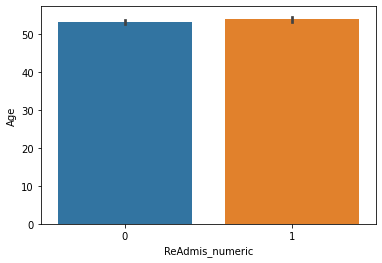

In [147]:
sns.barplot(data=df, x='ReAdmis_numeric', y='Age')

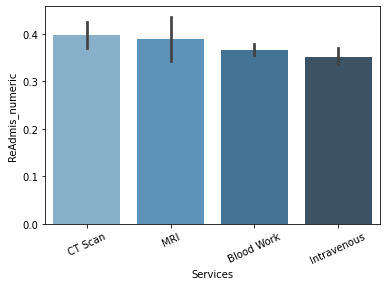

In [155]:
viz = sns.barplot(data=df, x='Services', y='ReAdmis_numeric', palette='Blues_d', 
                  order=['CT Scan', 'MRI', 'Blood Work', 'Intravenous'])
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

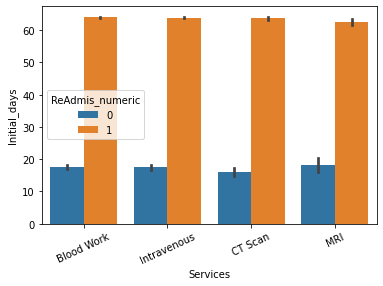

In [160]:
viz = sns.barplot(data=df, x='Services', y='Initial_days', hue='ReAdmis_numeric')
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

<AxesSubplot:xlabel='Initial_days', ylabel='Age'>

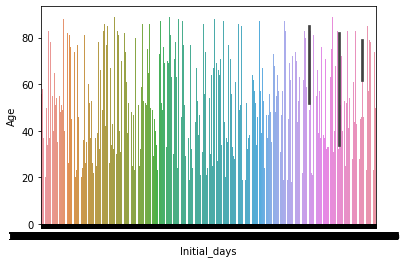

In [141]:
##Don't Run
sns.barplot(data=df, x='Initial_days', y='Age')

<AxesSubplot:xlabel='Age', ylabel='Initial_days'>

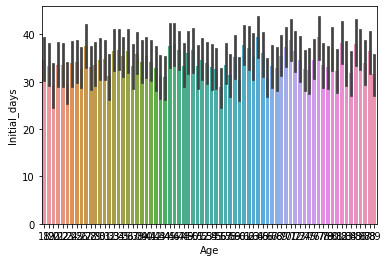

In [143]:
##Don't Run
sns.barplot(data=df, x='Age', y='Initial_days')

In [142]:
print(f'ReAdmis: {df.ReAdmis.dtype}')
print(f'Initial Days: {df.Initial_days.dtype}')
print(f'Services: {df.Services.dtype}')
print(f'Age: {df.Age.dtype}')
print(f'HighBlood: {df.HighBlood.dtype}')
print(f'Stroke: {df.Stroke.dtype}')
print(f'Complication_risk: {df.Complication_risk.dtype}')
print(f'Overweight: {df.Overweight.dtype}')
print(f'Arthritis: {df.Arthritis.dtype}')
print(f'Diabetes: {df.Diabetes.dtype}')
print(f'Hyperlipidemia: {df.Hyperlipidemia.dtype}')
print(f'BackPain: {df.BackPain.dtype}')
print(f'Anxiety: {df.Anxiety.dtype}')
print(f'Allergic_rhinitis: {df.Allergic_rhinitis.dtype}')
print(f'Reflux_esophagitis: {df.Reflux_esophagitis.dtype}')
print(f'Asthma: {df.Asthma.dtype}')

ReAdmis: object
Initial Days: float64
Services: object
Age: int64
HighBlood: object
Stroke: object
Complication_risk: object
Overweight: object
Arthritis: object
Diabetes: object
Hyperlipidemia: object
BackPain: object
Anxiety: object
Allergic_rhinitis: object
Reflux_esophagitis: object
Asthma: object


In [7]:
print(f'ReAdmis: {df.ReAdmis.unique()}')
print(f'Initial Days: {df.Initial_days.unique()}')
print(f'Services: {df.Services.unique()}')
print(f'Age: {df.Age.unique()}')
print(f'HighBlood: {df.HighBlood.unique()}')
print(f'Stroke: {df.Stroke.unique()}')
print(f'Complication_risk: {df.Complication_risk.unique()}')
print(f'Overweight: {df.Overweight.unique()}')
print(f'Arthritis: {df.Arthritis.unique()}')
print(f'Diabetes: {df.Diabetes.unique()}')
print(f'Hyperlipidemia: {df.Hyperlipidemia.unique()}')
print(f'BackPain: {df.BackPain.unique()}')
print(f'Anxiety: {df.Anxiety.unique()}')
print(f'Allergic_rhinitis: {df.Allergic_rhinitis.unique()}')
print(f'Reflux_esophagitis: {df.Reflux_esophagitis.unique()}')
print(f'Asthma: {df.Asthma.unique()}')

ReAdmis: ['No' 'Yes']
Initial Days: [10.58576971 15.12956221  4.77217721 ... 70.15418    63.3569
 70.85059   ]
Services: ['Blood Work' 'Intravenous' 'CT Scan' 'MRI']
Age: [53 51 78 22 76 50 40 48 55 64 41 45 85 57 44 54 72 84 86 52 31 37 19 75
 70 69 56 32 27 65 25 79 24 89 58 60 33 83 66 73 35 43 63 36 39 29 20 34
 47 18 59 82 26 74 38 28 77 30 87 23 80 71 68 67 88 62 49 21 61 81 42 46]
HighBlood: ['Yes' 'No']
Stroke: ['No' 'Yes']
Complication_risk: ['Medium' 'High' 'Low']
Overweight: ['No' 'Yes']
Arthritis: ['Yes' 'No']
Diabetes: ['Yes' 'No']
Hyperlipidemia: ['No' 'Yes']
BackPain: ['Yes' 'No']
Anxiety: ['Yes' 'No']
Allergic_rhinitis: ['Yes' 'No']
Reflux_esophagitis: ['No' 'Yes']
Asthma: ['Yes' 'No']


In [9]:
print(f'ReAdmis: {pd.api.types.is_numeric_dtype(df.ReAdmis)}')
print(f'Initial Days: {pd.api.types.is_numeric_dtype(df.Initial_days.dtype)}')
print(f'Services: {pd.api.types.is_numeric_dtype(df.Services.dtype)}')
print(f'Age: {pd.api.types.is_numeric_dtype(df.Age.dtype)}')
print(f'HighBlood: {pd.api.types.is_numeric_dtype(df.HighBlood.dtype)}')
print(f'Stroke: {pd.api.types.is_numeric_dtype(df.Stroke.dtype)}')
print(f'Complication_risk: {pd.api.types.is_numeric_dtype(df.Complication_risk.dtype)}')
print(f'Overweight: {pd.api.types.is_numeric_dtype(df.Overweight.dtype)}')
print(f'Arthritis: {pd.api.types.is_numeric_dtype(df.Arthritis.dtype)}')
print(f'Diabetes: {pd.api.types.is_numeric_dtype(df.Diabetes.dtype)}')
print(f'Hyperlipidemia: {pd.api.types.is_numeric_dtype(df.Hyperlipidemia.dtype)}')
print(f'BackPain: {pd.api.types.is_numeric_dtype(df.BackPain.dtype)}')
print(f'Anxiety: {pd.api.types.is_numeric_dtype(df.Anxiety.dtype)}')
print(f'Allergic_rhinitis: {pd.api.types.is_numeric_dtype(df.Allergic_rhinitis.dtype)}')
print(f'Reflux_esophagitis: {pd.api.types.is_numeric_dtype(df.Reflux_esophagitis.dtype)}')
print(f'Asthma: {pd.api.types.is_numeric_dtype(df.Asthma.dtype)}')


ReAdmis: False
Initial Days: True
Services: False
Age: True
HighBlood: False
Stroke: False
Complication_risk: False
Overweight: False
Arthritis: False
Diabetes: False
Hyperlipidemia: False
BackPain: False
Anxiety: False
Allergic_rhinitis: False
Reflux_esophagitis: False
Asthma: False


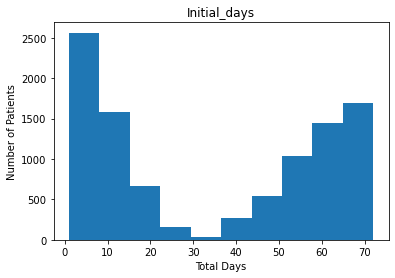

Initial Days Stats
min: 1.001980919
25th Quantile: 7.896214698
50th Quantile: 35.83624435
75th Quantile: 61.16102
max: 71.98149
mean: 34.45529926595239
median: 35.83624435
mode: 63.54432
Std: 26.30934131161786
skew: 0.07028608266045329
kurtosis: -1.7545246170896873


In [46]:
##Initial_days distribution
plt.hist(df.Initial_days)
plt.xlabel('Total Days')
plt.ylabel('Number of Patients')
plt.title('Initial_days')
plt.show()

##Initial_days univariate statistics
print('Initial Days Stats')
print('min:', df.Initial_days.min())
print('25th Quantile:', df.Initial_days.quantile(.25))
print('50th Quantile:', df.Initial_days.quantile(.50))
print('75th Quantile:', df.Initial_days.quantile(.75))
print('max:', df.Initial_days.max())
print('mean:', df.Initial_days.mean())
print('median:', df.Initial_days.median())
print('mode:', df.Initial_days.mode().values[0])
print('Std:', df.Initial_days.std())
print('skew:', skew(df.Initial_days, bias=False))
print('kurtosis:', kurtosis(df.Initial_days, bias=False))




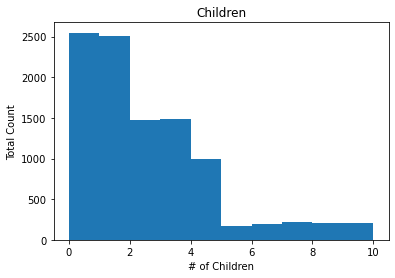

Children Stats
min: 0
25th Quantile: 0.0
50th Quantile: 1.0
75th Quantile: 3.0
max: 10
mean: 2.0972
median: 1.0
mode: 0
Std: 2.16365900779899
skew: 1.4480126219332756
kurtosis: 2.076321273332364


In [47]:
##Children distribution
plt.hist(df.Children)
plt.xlabel('Number of Children')
plt.ylabel('Total Count')
plt.title('Number of Children')
plt.show()

##Children univariate statistics
print('Children Stats')
print('min:', df.Children.min())
print('25th Quantile:', df.Children.quantile(.25))
print('50th Quantile:', df.Children.quantile(.50))
print('75th Quantile:', df.Children.quantile(.75))
print('max:', df.Children.max())
print('mean:', df.Children.mean())
print('median:', df.Children.median())
print('mode:', df.Children.mode().values[0])
print('Std:', df.Children.std())
print('skew:', skew(df.Children, bias=False))
print('kurtosis:', kurtosis(df.Children, bias=False))

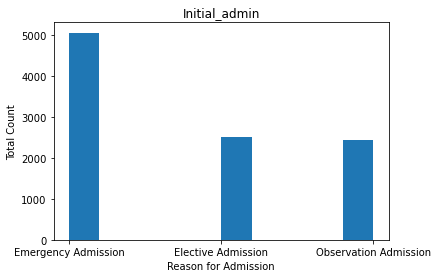

Initial_admin_numeric Stats
min: 0
25th Quantile: 0.0
50th Quantile: 0.0
75th Quantile: 1.0
max: 2
mean: 0.7376
median: 0.0
mode: 0
Std: 0.8251147322840162
skew: 0.5191601076816872
kurtosis: -1.3392723170631167


In [48]:
##Initial_admin distribution
plt.hist(df.Initial_admin)
plt.xlabel('Reason for Admission')
plt.ylabel('Total Count')
plt.title('Initial_admin')
plt.show()

##Initial_admin_numeric univariate statistics
print('Initial_admin_numeric Stats')
print('min:', df.Initial_admin_numeric.min())
print('25th Quantile:', df.Initial_admin_numeric.quantile(.25))
print('50th Quantile:', df.Initial_admin_numeric.quantile(.50))
print('75th Quantile:', df.Initial_admin_numeric.quantile(.75))
print('max:', df.Initial_admin_numeric.max())
print('mean:', df.Initial_admin_numeric.mean())
print('median:', df.Initial_admin_numeric.median())
print('mode:', df.Initial_admin_numeric.mode().values[0])
print('Std:', df.Initial_admin_numeric.std())
print('skew:', skew(df.Initial_admin_numeric, bias=False))
print('kurtosis:', kurtosis(df.Initial_admin_numeric, bias=False))

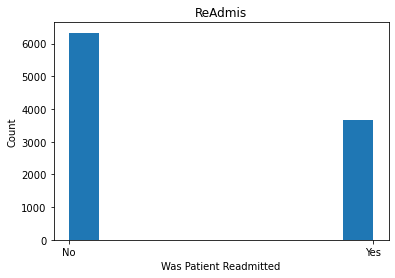

ReAdmis_numeric Stats
min: 0
25th Quantile: 0.0
50th Quantile: 0.0
75th Quantile: 1.0
max: 1
mean: 0.3669
median: 0.0
mode: 0
Std: 0.48198300878982964
skew: 0.5524121095443897
kurtosis: -1.695179937226946


In [49]:
##ReAdmis_numeric distribution
plt.hist(df.ReAdmis)
plt.xlabel('Was Patient Readmitted')
plt.ylabel('Count')
plt.title('ReAdmis')
plt.show()

##ReAdmis_numeric univariate statistics
print('ReAdmis_numeric Stats')
print('min:', df.ReAdmis_numeric.min())
print('25th Quantile:', df.ReAdmis_numeric.quantile(.25))
print('50th Quantile:', df.ReAdmis_numeric.quantile(.50))
print('75th Quantile:', df.ReAdmis_numeric.quantile(.75))
print('max:', df.ReAdmis_numeric.max())
print('mean:', df.ReAdmis_numeric.mean())
print('median:', df.ReAdmis_numeric.median())
print('mode:', df.ReAdmis_numeric.mode().values[0])
print('Std:', df.ReAdmis_numeric.std())
print('skew:', skew(df.ReAdmis_numeric, bias=False))
print('kurtosis:', kurtosis(df.ReAdmis_numeric, bias=False))

t-value: -56.98946649338368
p-value: 0.0


C:\Users\mmorg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mmorg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

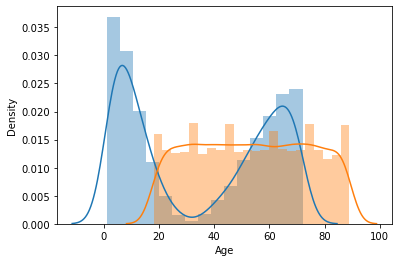

In [11]:
#T-test
t, p = stats.ttest_ind(df.Initial_days, df.Age)

print(f't-value: {t}')
print(f'p-value: {p}')

sns.distplot(df.Initial_days, label='Initial_days')
sns.distplot(df.Age, label='Age')


In [15]:
f, p = stats.f_oneway(df.Initial_days, df.Age)

print(f'f-value: {f}')
print(f'p-value: {p}')

f-value: 3247.799291200502
p-value: 0.0


In [16]:
##Turn ReAdmis and Services into numeric data
df['ReAdmis_numeric'] = df['ReAdmis']
dict_ReAdmis = {"ReAdmis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_ReAdmis, inplace=True)

df['Services_numeric'] = df['Services']
dict_services = {"Services_numeric": {"Blood Work": 0, "Intravenous": 1, "CT Scan": 2, "MRI": 3}}
df.replace(dict_services, inplace=True)

In [17]:
f, p = stats.f_oneway(df.ReAdmis_numeric, df.Age)

print(f'f-value: {f}')
print(f'p-value: {p}')

f-value: 66271.51417703483
p-value: 0.0


In [18]:
f, p = stats.f_oneway(df.ReAdmis_numeric, df.Services_numeric)

print(f'f-value: {f}')
print(f'p-value: {p}')

f-value: 1005.4732870859004
p-value: 2.436285345099231e-215


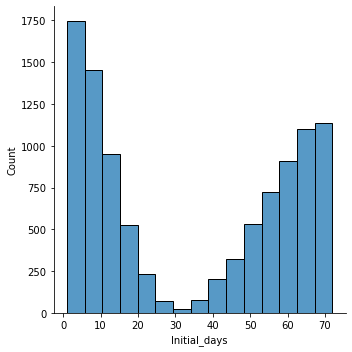

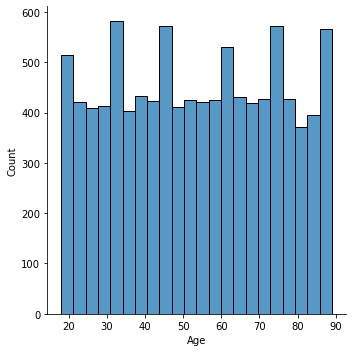

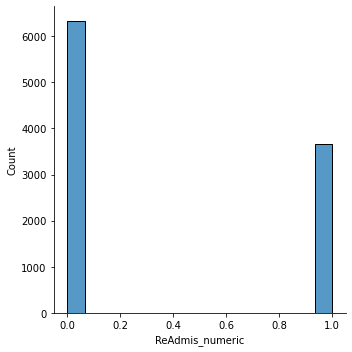

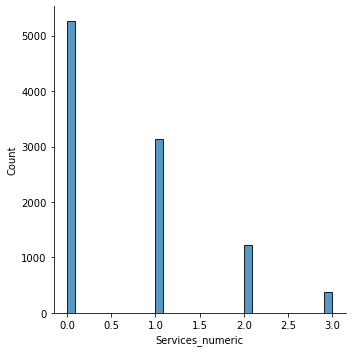

In [19]:
sns.displot(df.Initial_days, label='Initial_days')
sns.displot(df.Age, label='Age')
sns.displot(df.ReAdmis_numeric, label='ReAdmis_numeric')
sns.displot(df.Services_numeric, label='Services_numeric')

<AxesSubplot:xlabel='Age', ylabel='Count'>

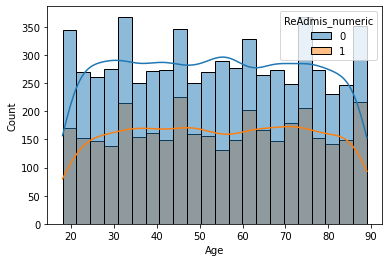

In [20]:
sns.histplot(data=df, x="Age", hue="ReAdmis_numeric", kde=True)

C:\Users\mmorg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mmorg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

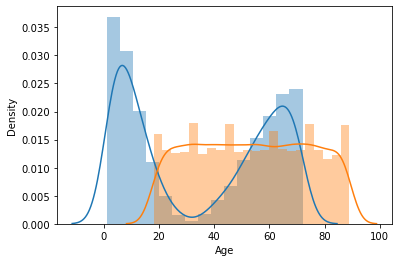

In [40]:
sns.distplot(df.Initial_days, label='ReAdmis_numeric')
sns.distplot(df.Age, label='Age')

<AxesSubplot:xlabel='Services', ylabel='Count'>

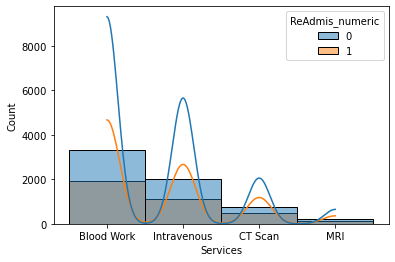

In [21]:
sns.histplot(data=df, x="Services", hue="ReAdmis_numeric", kde=True)

<AxesSubplot:xlabel='Initial_days', ylabel='Count'>

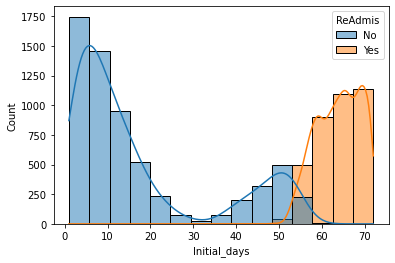

In [22]:
sns.histplot(data=df, x="Initial_days", hue="ReAdmis", kde=True)

In [23]:
## Do not run this plot
##sns.histplot(data=df, x="Age", hue="Initial_days", kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

C:\Users\mmorg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 386x150024 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [38]:
#T-test
t, p = stats.ttest_ind(df.Initial_days, df.ReAdmis_numeric)

print(f't-value: {t}')
print(f'p-value: {p}')

t-value: 129.54592813419822
p-value: 0.0


In [41]:
stats.f_oneway(df.Age, df.ReAdmis_numeric)

F_onewayResult(statistic=66271.51417703483, pvalue=0.0)

In [ ]:
# two sample t-test

from scipy.stats import ttest_ind

t_stat,pvalue = ttest_ind(df['ReAdmis_numeric'], df['Initial_days'])
print('t-statistics:',t_stat, '\np-value:', pvalue)

if pvalue < .05:
        print('Reject Null Hypothesis H0')
elif pvalue > .05:
        print('Fail to reject Null Hypothesis H0')

In [ ]:
# two sample t-test

from scipy.stats import ttest_ind

t_stat,pvalue = ttest_ind(df['ReAdmis_numeric'], df['Children'])
print('t-statistics:',t_stat, '\np-value:', pvalue)

if pvalue < .05:
        print('Reject Null Hypothesis H0')
elif pvalue > .05:
        print('Fail to reject Null Hypothesis H0')

In [ ]:
# two sample t-test

from scipy.stats import ttest_ind

t_stat,pvalue = ttest_ind(df['ReAdmis_numeric'], df['Initial_admin_numeric'])
print('t-statistics:',t_stat, '\np-value:', pvalue)

if pvalue < .05:
        print('Reject Null Hypothesis H0')
elif pvalue > .05:
        print('Fail to reject Null Hypothesis H0')

In [ ]:
sns.boxplot(x='ReAdmis_numeric', data=df)
plt.show()
sns.boxplot(x='Initial_days', data=df)
plt.show()
sns.boxplot(x='Children', data=df)
plt.show()
sns.boxplot(x='Initial_admin_numeric', data=df)
plt.show()